<a href="https://colab.research.google.com/github/mansi812/ML-assignment/blob/main/ML_assignment_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#The following code snippet is used to upload a file from the local drive to Colab
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Coupon Reco.xlsx to Coupon Reco.xlsx
User uploaded file "Coupon Reco.xlsx" with length 1207913 bytes


In [ ]:
fname = "Coupon Reco.xlsx"
df = pd.read_excel(fname)


In [ ]:
#Check the first 5 records
df.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
df.shape

(12684, 25)

In [ ]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

destination               0
passenger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [ ]:
#Distribution of target variable in dataset
df['Y'].value_counts()

1    7210
0    5474
Name: Y, dtype: int64

In [ ]:
df.columns

Index(['destination', 'passenger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0: Not accepted|| 1: accepted)')

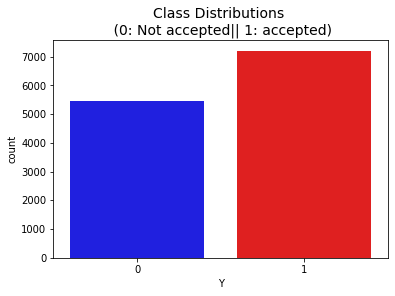

In [ ]:
colors = ["blue", "red"]

sns.countplot('Y', data=df, palette=colors)
plt.title('Class Distributions \n (0: Not accepted|| 1: accepted)', fontsize=14)

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

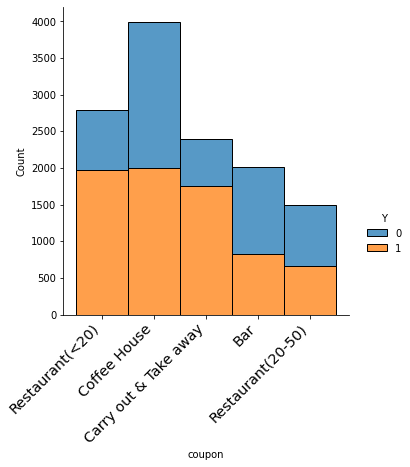

In [ ]:
#checking which coupons are most accepted
plt.figure(figsize=(8,4))
sns.displot(df, x='coupon', hue='Y', multiple='stack')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

([0, 1], <a list of 2 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

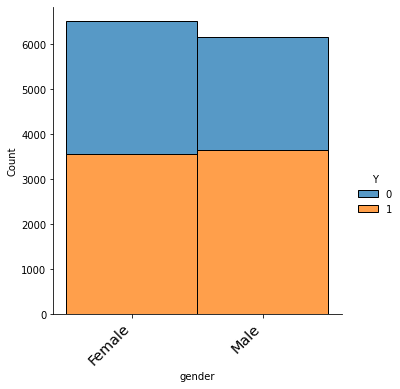

In [ ]:
#checking which gender accepts coupons the most
plt.figure(figsize=(8,4))
sns.displot(df, x='gender', hue='Y', multiple='stack')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

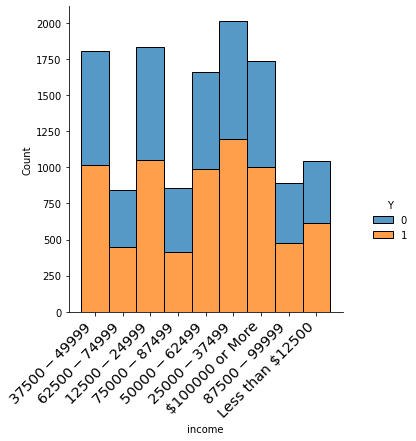

In [ ]:
#checking which income group accepts the coupon the most
plt.figure(figsize=(8,4))
sns.displot(df, x='income', hue='Y', multiple='stack')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

([0, 1, 2, 3, 4], <a list of 5 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

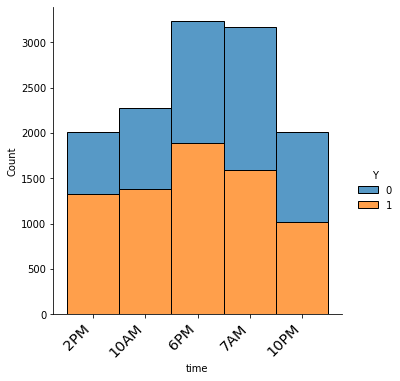

In [ ]:
#checking  coupons are most accepted at what time
plt.figure(figsize=(8,4))
sns.displot(df, x='time', hue='Y', multiple='stack')
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

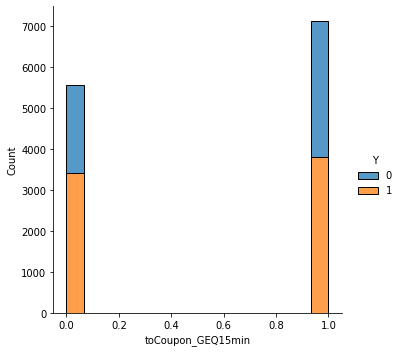

In [ ]:
sns.displot(df, x='toCoupon_GEQ15min', hue='Y', multiple='stack')

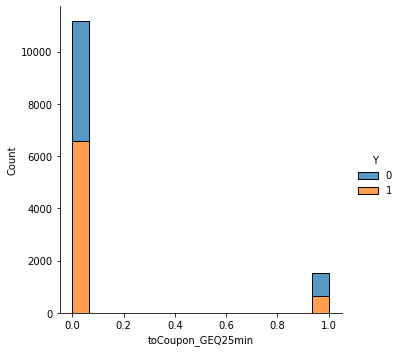

In [ ]:
sns.displot(df, x='toCoupon_GEQ25min', hue='Y', multiple='stack')

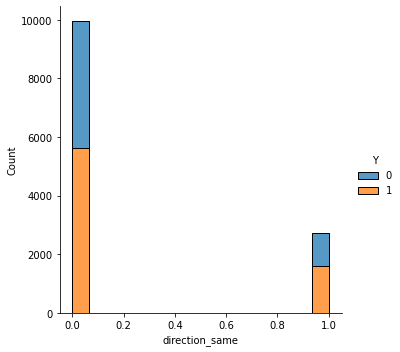

In [ ]:
##checking whether the direction of the rest/bar impacts the coupon acceptance
sns.displot(df, x='direction_same', hue='Y', multiple='stack')

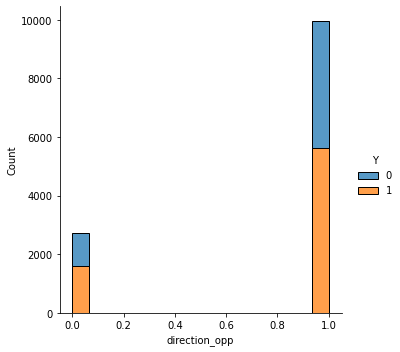

In [ ]:
sns.displot(df, x='direction_opp', hue='Y', multiple='stack')

In [ ]:
df.dtypes

destination             object
passenger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

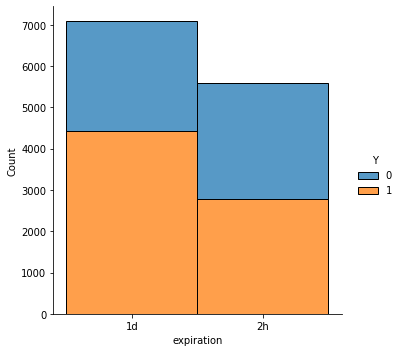

In [ ]:
sns.displot(df, x='expiration', hue='Y', multiple='stack')

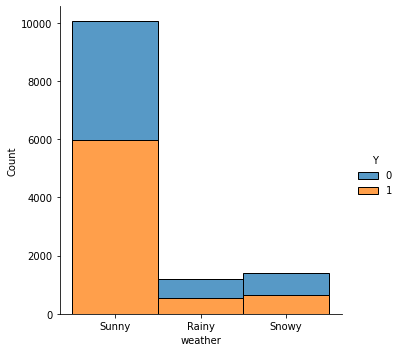

In [ ]:
sns.displot(df, x='weather', hue='Y', multiple='stack')

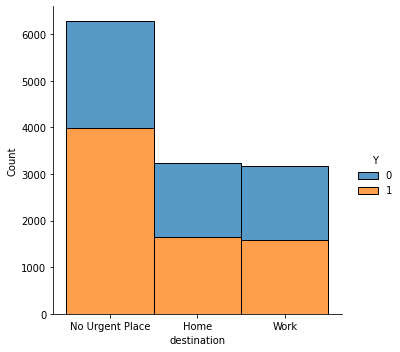

In [ ]:
sns.displot(df, x='destination', hue='Y', multiple='stack')

In [ ]:
#Remove NAs from the dataset
data = df.dropna(axis = 0, how ='any')

In [ ]:
data.shape

(12079, 25)

**Naive Bayes Classification Start**

In [ ]:
data = pd.get_dummies(data, columns = ['destination'])
data = pd.get_dummies(data, columns = ['passenger'])
data = pd.get_dummies(data, columns = ['weather'])
data = pd.get_dummies(data, columns = ['temperature'])
data = pd.get_dummies(data, columns = ['time'])
data = pd.get_dummies(data, columns = ['coupon'])
data = pd.get_dummies(data, columns = ['expiration'])
data = pd.get_dummies(data, columns = ['gender'])
data = pd.get_dummies(data, columns = ['age'])
data = pd.get_dummies(data, columns = ['maritalStatus'])
data = pd.get_dummies(data, columns = ['has_children'])
data = pd.get_dummies(data, columns = ['education'])
data = pd.get_dummies(data, columns = ['occupation'])
data = pd.get_dummies(data, columns = ['income'])
data = pd.get_dummies(data, columns = ['Bar'])
data = pd.get_dummies(data, columns = ['CoffeeHouse'])
data = pd.get_dummies(data, columns = ['CarryAway'])
data = pd.get_dummies(data, columns = ['RestaurantLessThan20'])
data = pd.get_dummies(data, columns = ['Restaurant20To50'])

In [ ]:
data.columns

Index(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passenger_Alone',
       ...
       'RestaurantLessThan20_1~3', 'RestaurantLessThan20_4~8',
       'RestaurantLessThan20_gt8', 'RestaurantLessThan20_less1',
       'RestaurantLessThan20_never', 'Restaurant20To50_1~3',
       'Restaurant20To50_4~8', 'Restaurant20To50_gt8',
       'Restaurant20To50_less1', 'Restaurant20To50_never'],
      dtype='object', length=113)

In [ ]:
data.head()

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,temperature_30,temperature_55,temperature_80,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,...,occupation_Protective Service,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
22,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
23,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
24,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
25,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
26,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0


In [ ]:
predictCol = data.pop("Y")
data.insert(112, "Y", predictCol)
data.head()

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,temperature_30,temperature_55,temperature_80,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,...,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,Y
22,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
23,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
24,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
25,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
26,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
data.columns

Index(['toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'destination_Home',
       'destination_No Urgent Place', 'destination_Work', 'passenger_Alone',
       'passenger_Friend(s)',
       ...
       'RestaurantLessThan20_4~8', 'RestaurantLessThan20_gt8',
       'RestaurantLessThan20_less1', 'RestaurantLessThan20_never',
       'Restaurant20To50_1~3', 'Restaurant20To50_4~8', 'Restaurant20To50_gt8',
       'Restaurant20To50_less1', 'Restaurant20To50_never', 'Y'],
      dtype='object', length=113)

In [ ]:
from mlxtend.preprocessing import minmax_scaling
data = minmax_scaling(data,columns = data.columns)
data.head()

,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,temperature_30,temperature_55,temperature_80,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,...,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,Y
22,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25,NaN,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,NaN,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
data = data.dropna(axis=1)
data.head()

,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passenger_Alone,passenger_Friend(s),passenger_Kid(s),passenger_Partner,weather_Rainy,weather_Snowy,weather_Sunny,temperature_30,temperature_55,temperature_80,time_10AM,time_10PM,time_2PM,time_6PM,time_7AM,coupon_Bar,coupon_Carry out & Take away,coupon_Coffee House,coupon_Restaurant(20-50),coupon_Restaurant(<20),expiration_1d,expiration_2h,gender_Female,gender_Male,age_21,age_26,age_31,age_36,age_41,age_46,age_50plus,age_below21,maritalStatus_Divorced,...,occupation_Retired,occupation_Sales & Related,occupation_Student,occupation_Transportation & Material Moving,occupation_Unemployed,income_$100000 or More,income_$12500 - $24999,income_$25000 - $37499,income_$37500 - $49999,income_$50000 - $62499,income_$62500 - $74999,income_$75000 - $87499,income_$87500 - $99999,income_Less than $12500,Bar_1~3,Bar_4~8,Bar_gt8,Bar_less1,Bar_never,CoffeeHouse_1~3,CoffeeHouse_4~8,CoffeeHouse_gt8,CoffeeHouse_less1,CoffeeHouse_never,CarryAway_1~3,CarryAway_4~8,CarryAway_gt8,CarryAway_less1,CarryAway_never,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,Y
22,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
23,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
24,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
25,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
array = data.values

# Features: first 20 columns
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# 20% of the data will be used for testing
test_size= 0.20
seed = 42
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size, random_state=seed)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Predict
predictions = model.predict(X_test)
print(accuracy_score(Y_test, predictions))

0.6382450331125827


In [ ]:
predictions

array([1., 0., 0., ..., 0., 1., 0.])

[[717 304]
 [570 825]]


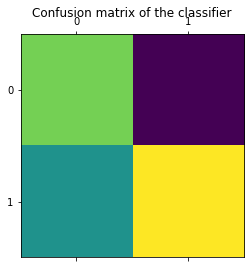

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(Y_test, predictions))

cm = confusion_matrix(Y_test, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
#pl.colorbar()
pl.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.56      0.70      0.62      1021
         1.0       0.73      0.59      0.65      1395

    accuracy                           0.64      2416
   macro avg       0.64      0.65      0.64      2416
weighted avg       0.66      0.64      0.64      2416



In [ ]:
#Acccuracy - how many predictions are correct?
accuracy = (717 + 825)/(717+825+304+570)
accuracy

0.6382450331125827

In [ ]:
#Precision  - how many predicted 1s are correct?
precision = 825/(825 + 304)
precision

0.7307351638618246

In [ ]:
#Recall - how many of the actual 1s did the classifier predict correctly?
recall = 825/(825 + 570)
recall

0.5913978494623656

**Starting Naive Bayes Classification Ends**

**Logistic Regression Start**

In [ ]:
# X_train, X_test, Y_train, Y_test
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import accuracy_score

predictions = lr_model.predict(X_test)
print(accuracy_score(predictions, Y_test))

0.6841887417218543


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, predictions)
print(cm)

[[ 602  419]
 [ 344 1051]]


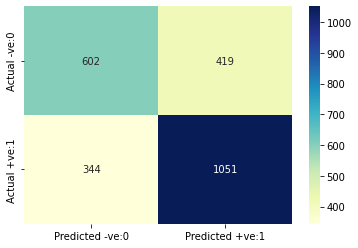

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predicted -ve:0', 'Predicted +ve:1'], 
                                 index=['Actual -ve:0', 'Actual +ve:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.64      0.59      0.61      1021
         1.0       0.71      0.75      0.73      1395

    accuracy                           0.68      2416
   macro avg       0.68      0.67      0.67      2416
weighted avg       0.68      0.68      0.68      2416



In [ ]:
prediction_prob = lr_model.predict_proba(X_test)[:,1]

prediction_prob[prediction_prob > 0.6] = 1
prediction_prob[prediction_prob <= 0.6] = 0

In [ ]:
print(accuracy_score(Y_test,prediction_prob))

0.6622516556291391


**Logistic Regression Ends**

**Random Forest Start**

In [ ]:
X = data.drop(['Y'],axis =1)
cols = X.columns

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rfc = RandomForestClassifier(n_estimators = 10, random_state=0, oob_score=True)

# fit the model
rfc.fit(X_train, Y_train)

# Predict the Test set results
Y_pred = rfc.predict(X_test)


# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score with 10 decision-trees : 0.7252


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [ ]:
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set
rfc_100.fit(X_train, Y_train)

# Predict on the test set results
Y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_100)))

Model accuracy score with 100 decision-trees : 0.7504


In [ ]:
# view the feature scores
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

coupon_Carry out & Take away                            0.026055
coupon_Coffee House                                     0.022853
coupon_Restaurant(<20)                                  0.022834
CoffeeHouse_never                                       0.022080
coupon_Bar                                              0.020927
                                                          ...   
CarryAway_never                                         0.001371
education_Some High School                              0.001165
occupation_Production Occupations                       0.000947
occupation_Farming Fishing & Forestry                   0.000587
occupation_Building & Grounds Cleaning & Maintenance    0.000453
Length: 111, dtype: float64

In [ ]:
# Print the Confusion Matrix and slice it into four pieces
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[ 730  291]
 [ 373 1022]]


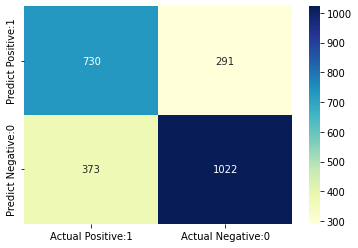

In [ ]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.71      0.69      1021
         1.0       0.78      0.73      0.75      1395

    accuracy                           0.73      2416
   macro avg       0.72      0.72      0.72      2416
weighted avg       0.73      0.73      0.73      2416



**Random Forest Ends**

***Neural Network Start***

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit(X_test)

In [ ]:
X_train.shape

(9663, 111)

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model_NN = keras.Sequential([
          keras.layers.Dense(13, activation='relu', input_shape = (111,)),
          keras.layers.Dense(128,activation='relu'),
          keras.layers.Dense(1,activation='sigmoid')
])

# Step 2 - Compile the model
model_NN.compile(optimizer = 'sgd',loss='binary_crossentropy',metrics=['accuracy'])

model_history = model_NN.fit(X_train,Y_train, epochs=50, validation_split=0.2)

Epoch 1/50
242/242 [==============================] - 1s 2ms/step - loss: 0.6856 - accuracy: 0.5561 - val_loss: 0.6775 - val_accuracy: 0.5861
Epoch 2/50
242/242 [==============================] - 0s 1ms/step - loss: 0.6739 - accuracy: 0.5829 - val_loss: 0.6713 - val_accuracy: 0.5939
Epoch 3/50
242/242 [==============================] - 0s 1ms/step - loss: 0.6658 - accuracy: 0.5918 - val_loss: 0.6658 - val_accuracy: 0.5954
Epoch 4/50
242/242 [==============================] - 0s 1ms/step - loss: 0.6566 - accuracy: 0.6053 - val_loss: 0.6589 - val_accuracy: 0.6079
Epoch 5/50
242/242 [==============================] - 0s 1ms/step - loss: 0.6465 - accuracy: 0.6188 - val_loss: 0.6505 - val_accuracy: 0.6073
Epoch 6/50
242/242 [==============================] - 0s 1ms/step - loss: 0.6360 - accuracy: 0.6364 - val_loss: 0.6417 - val_accuracy: 0.6130
Epoch 7/50
242/242 [==============================] - 0s 1ms/step - loss: 0.6259 - accuracy: 0.6501 - val_loss: 0.6333 - val_accuracy: 0.6260
Epoch 

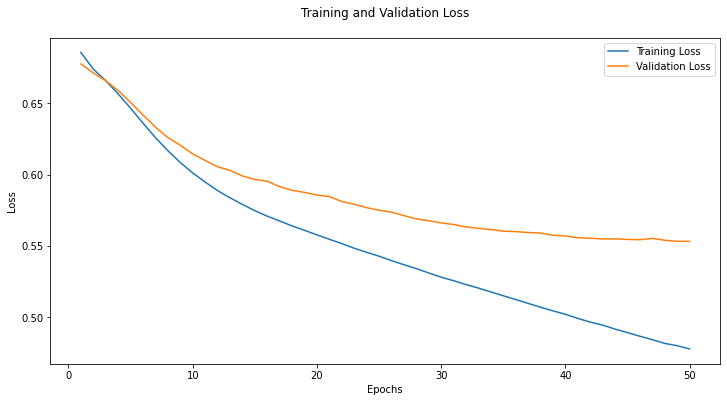

In [ ]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
epoch = range(1, 51)
sns.lineplot(epoch, train_loss, label = 'Training Loss')
sns.lineplot(epoch, val_loss, label = 'Validation Loss')
plt.title('Training and Validation Loss\n')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

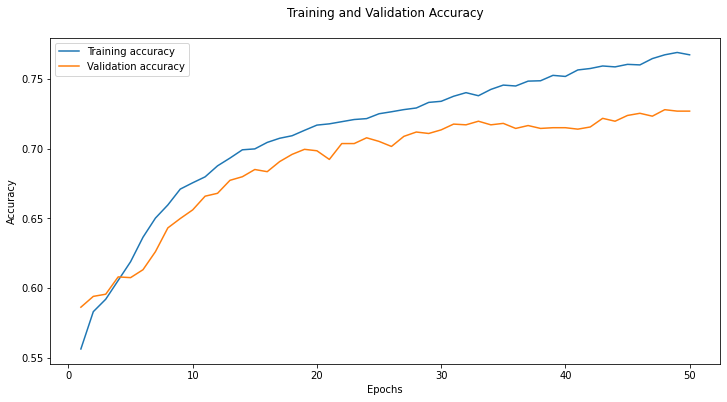

In [ ]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['accuracy']
val_loss = model_history.history['val_accuracy'] 
epoch = range(1, 51)
sns.lineplot(epoch, train_loss, label = 'Training accuracy')
sns.lineplot(epoch, val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
eval = model_NN.evaluate(X_test,Y_test)

ValueError: ignored

Data cleanup
All the NAs were removed from the dataset.

EDA: the coupon acceptance was checked against various parameters like weather, destination etc. Bar plots are shared  in the analysis above.

Metric:Accuracy is the quintessential classification metric. It is pretty easy to understand. And easily suited for binary as well as a multiclass classification problem. Accuracy is the proportion of true results among the total number of cases examined

Management Summary
The ata was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the
person whether he will accept the coupon if he is the driver.


Initial data exploration  shows more than 50% of the drivers are accepting the coupon. The most accepted coupons are restaurant and coffee house coupons. the income group 12500-50K, accepts most of the coupons while the distribution is not much varied for male and female counterparts. Most of the coupons are accepted during the evening time . Distance to coupon  redemption centre and direction if restaurant/coffee house does not impact the coupon acceptance rate. Couopns that  have longer validity are accepted more.Coupons are most likely accepted  when the weather is sunny and destination is not an urgent place.
Various classification algorithms were  run on the dataset to check  how accurately are we able to predict the acceptance of coupon.with  the help of Random Forest and Neural Netwroks classifier, we are able  to predict the couopn acceptance with an  accuracy rate of 73%. the Random Forest classifier also shows that type of coupon is  the most important deciding factor  for coupon acceptance.

***Neural Network Ends***